## Resumo:
Procurei descrever meu procedimento e escolhas para contornar deficiências nos dados que notei até agora. Ao longo deste notebook explicarei os cálculos que usei e demais procedimentos.

### Sobre o PSQI
O PSQI é composto por **19 questões autoaplicáveis** (respondidas pela própria pessoa) e **5 questões para o companheiro de quarto/cama** (usadas apenas como informação complementar, não entram na pontuação final).

As **19 questões principais** são agrupadas em **7 componentes**, cada um recebendo uma pontuação de **0 a 3**, em que:

* **0** = ausência de dificuldade
* **3** = dificuldade grave

Esses 7 componentes são:

1. **Qualidade subjetiva do sono**: Como o indivíduo avalia a própria qualidade do sono (muito boa → muito ruim).

2. **Latência do sono**: Tempo que leva para adormecer e frequência de dificuldades para iniciar o sono.

3. **Duração do sono**: Quantas horas dorme efetivamente por noite.

4. **Eficiência habitual do sono**: Relação entre tempo total de sono e tempo passado na cama (% de eficiência).

5. **Distúrbios do sono**: Frequência de problemas durante a noite, como acordar para ir ao banheiro, dor, ronco, pesadelos, etc.

6. **Uso de medicamentos para dormir**: Frequência do uso de remédios indutores do sono.

7. **Disfunção diurna**: Problemas durante o dia relacionados ao sono, como sonolência, fadiga ou dificuldade de concentração.


### Score total - Maior PSQI implica em um soninho pior

* A pontuação de cada componente (0–3) é somada, resultando em um escore **global de 0 a 21**.
* **Interpretação geral:**

  * **0–4** → Boa qualidade do sono
  * **5–10** → Qualidade de sono ruim
  * **>10** → Distúrbios graves do sono

### Variáveis para PSQI presentes no dataset ou estimáveis
- ✔️: Ok
- 🚫: Treta detectada

---

1. ✔️ Qualidade subjetiva do sono: `sono_qualidade`
2. ✔️ Latência do sono (tempo até adormecer): `sono_tempo_adormecer`
3. ✔️ Duração do sono: `sono_horas`
4. 🚫 Eficiência do sono (tempo dormindo ÷ tempo na cama): Para estimar, poderia assumir que “tempo na cama ≈ tempo de sono + tempo para adormecer”, mas isso é bem aproximado.
5. ✔️ Distúrbios do sono: `sono_acorda_noite`
6. 🚫 Uso de medicamentos para dormir: Não aparece nos seus dados. (ficaria faltando).
7. 🚫 Disfunção diurna (sonolência, fadiga durante o dia): Não aparece diretamente. Talvez indiretamente via `trabalho_horas` + `exercicio_freq`, mas isso seria uma aproximação.

Por enquanto preferi analisar os dados considerando apenas os 7 componentes e dados faltantes.


### Carregando os Dados

In [1]:
import pandas as pd

dados = pd.read_excel('./dados/Respostas_Pesquisa_Sono_Estudantes.xlsx')
dados.head()

,Carimbo de data/hora,\n1- Gênero,2 - Idade,3 - Nível de escolaridade,"4 - Você trabalha? Se sim, qual modalidade?","5 - Caso trabalhe, quantas horas por dia, em média?","6 - Você pratica exercícios físicos? Se sim, quantos dias da semana?","7 - Faz uso de redes sociais? Em caso afirmativo, assinale as 3 redes sociais mais utilizadas por você.",8 - Quantas horas por dia você utiliza redes sociais?,9 - Você costumar utilizar redes sociais até 2h ANTES de dormir?,"10 - Quantas horas de sono você costuma ter por noite, em média?","11 - Quanto tempo, em média, você leva para adormecer depois de deitar?",12 - Você costuma acordar durante a noite ou muito cedo e não consegue voltar a dormir?,"13 - Faz consumo de café, chá ou bebidas energéticas após as 18h?",Pontuação,14 - Você costuma sentir que dormiu mal ou tem sono leve/agitado?
0,2025-09-04 08:54:52.716,Feminino,26 a 45 anos,Cursando Doutorado,Presencial,5 a 8 horas,5 dias,"Instagram, WhatsApp, X (antigo Twitter)",Até 3 horas por dia,Sim,Até 8 horas por noite,Menos de 15 minutos,Menos de 1 vez por semana,Não,0,Menos de 1 vez por semana
1,2025-09-04 09:15:02.201,Feminino,26 a 45 anos,Cursando Pós Graduação,Presencial,Acima de 8h,3 dias,"Instagram, WhatsApp, YouTube",Até 3 horas por dia,Sim,Até 6 horas por noite,Menos de 15 minutos,Nunca ou raramente,Não,0,3 ou mais vezes por semana
2,2025-09-04 09:18:14.886,Feminino,26 a 45 anos,Cursando Mestrado,Presencial,5 a 8 horas,4 dias,"Discord, Instagram, Facebook, Pinterest, Whats...",Até 3 horas por dia,Sim,Até 7 horas por noite,31 a 60 minutos,Nunca ou raramente,Sim,0,Menos de 1 vez por semana
3,2025-09-04 09:41:43.534,Feminino,26 a 45 anos,Cursando o Ensino Superior,Presencial,5 a 8 horas,Não pratico atividades físicas,"Facebook, WhatsApp",Até 3 horas por dia,Sim,Até 8 horas por noite,31 a 60 minutos,3 ou mais vezes por semana,Sim,0,3 ou mais vezes por semana
4,2025-09-04 09:44:11.165,Masculino,26 a 45 anos,Cursando o Ensino Superior,Home office,5 a 8 horas,3 dias,Outros…,Não utilizo redes sociais,Não,Até 8 horas por noite,31 a 60 minutos,Nunca ou raramente,Não,0,Menos de 1 vez por semana


In [2]:
colunas_simples = {
    'Carimbo de data/hora': 'timestamp',
    '\n1- Gênero': 'genero',
    '2 - Idade': 'idade',
    '3 - Nível de escolaridade': 'escolaridade',
    '4 - Você trabalha? Se sim, qual modalidade?': 'trabalho_modalidade',
    '5 - Caso trabalhe, quantas horas por dia, em média?': 'trabalho_horas',
    '6 - Você pratica exercícios físicos? Se sim, quantos dias da semana?': 'exercicio_freq',
    '7 - Faz uso de redes sociais? Em caso afirmativo, assinale as 3 redes sociais mais utilizadas por você.': 'redes_uso',
    '8 - Quantas horas por dia você utiliza redes sociais?': 'redes_horas',
    '9 - Você costumar utilizar redes sociais até 2h ANTES de dormir?': 'redes_antes_dormir',
    '10 - Quantas horas de sono você costuma ter por noite, em média?': 'sono_horas',
    '11 -  Quanto tempo, em média, você leva para adormecer depois de deitar?': 'sono_tempo_adormecer',
    '12 - Você costuma acordar durante a noite ou muito cedo e não consegue voltar a dormir?': 'sono_acorda_noite',
    '13 - Faz consumo de café, chá ou bebidas energéticas após as 18h?': 'cafe_apos_18h',
    'Pontuação': 'pontuacao',
    '14 -  Você costuma sentir que dormiu mal ou tem sono leve/agitado?': 'sono_qualidade'
}

# Atribuindo nomes as variaveis
dados = dados.rename(columns=colunas_simples)

In [3]:
dados.sample(5)

,timestamp,genero,idade,escolaridade,trabalho_modalidade,trabalho_horas,exercicio_freq,redes_uso,redes_horas,redes_antes_dormir,sono_horas,sono_tempo_adormecer,sono_acorda_noite,cafe_apos_18h,pontuacao,sono_qualidade
90,2025-09-05 12:38:33.552,Feminino,26 a 45 anos,Cursando o Ensino Superior,Presencial,5 a 8 horas,Não pratico atividades físicas,"Instagram, Facebook, WhatsApp",Até 5 horas por dia,Sim,Até 7 horas por noite,16 a 30 minutos,3 ou mais vezes por semana,Não,0,3 ou mais vezes por semana
0,2025-09-04 08:54:52.716,Feminino,26 a 45 anos,Cursando Doutorado,Presencial,5 a 8 horas,5 dias,"Instagram, WhatsApp, X (antigo Twitter)",Até 3 horas por dia,Sim,Até 8 horas por noite,Menos de 15 minutos,Menos de 1 vez por semana,Não,0,Menos de 1 vez por semana
36,2025-09-04 12:46:21.454,Masculino,26 a 45 anos,Cursando o Ensino Superior,Presencial,5 a 8 horas,Não pratico atividades físicas,"Discord, Instagram, Facebook",Até 1 hora por dia,Sim,Até 7 horas por noite,Menos de 15 minutos,Nunca ou raramente,Sim,0,1 a 2 vezes por semana
55,2025-09-04 19:28:12.068,Masculino,26 a 45 anos,Cursando o Ensino Superior,Presencial,5 a 8 horas,Não pratico atividades físicas,"Instagram, Facebook, WhatsApp, X (antigo Twitt...",Até 3 horas por dia,Sim,Até 8 horas por noite,16 a 30 minutos,3 ou mais vezes por semana,Não,0,3 ou mais vezes por semana
56,2025-09-04 19:47:31.287,Masculino,46 a 64 anos,Outra modalidade de estudos,Home office,5 a 8 horas,Não pratico atividades físicas,"Telegram, WhatsApp, YouTube",Até 1 hora por dia,Não,Até 6 horas por noite,31 a 60 minutos,1 a 2 vezes por semana,Não,0,1 a 2 vezes por semana


### Tratando dados

In [4]:
# Verificando valores ausentes
dados.isnull().sum()

timestamp                0
genero                   0
idade                    0
escolaridade             0
trabalho_modalidade      0
trabalho_horas           0
exercicio_freq           0
redes_uso                0
redes_horas              0
redes_antes_dormir       0
sono_horas               0
sono_tempo_adormecer     0
sono_acorda_noite        0
cafe_apos_18h            0
pontuacao                0
sono_qualidade          12
dtype: int64

In [5]:
dados[dados['sono_qualidade'].isnull()]

,timestamp,genero,idade,escolaridade,trabalho_modalidade,trabalho_horas,exercicio_freq,redes_uso,redes_horas,redes_antes_dormir,sono_horas,sono_tempo_adormecer,sono_acorda_noite,cafe_apos_18h,pontuacao,sono_qualidade
6,2025-09-04 09:47:58.337,Feminino,26 a 45 anos,Cursando o Ensino Superior,Presencial,5 a 8 horas,3 dias,"Discord, Instagram, WhatsApp",Até 3 horas por dia,Sim,Mais de 8 horas por noite,16 a 30 minutos,3 ou mais vezes por semana,Sim,0,NaN
7,2025-09-04 09:49:59.712,Feminino,26 a 45 anos,Cursando o Ensino Superior,Presencial,5 a 8 horas,3 dias,"Instagram, Facebook, YouTube",Até 3 horas por dia,Sim,Até 8 horas por noite,16 a 30 minutos,3 ou mais vezes por semana,Não,0,NaN
8,2025-09-04 09:55:06.890,Masculino,46 a 64 anos,Cursando Mestrado,Híbrido / Semi-presencial,5 a 8 horas,1 dia,"WhatsApp, YouTube",Até 3 horas por dia,Sim,Até 7 horas por noite,16 a 30 minutos,Nunca ou raramente,Não,0,NaN
9,2025-09-04 09:55:44.860,Feminino,26 a 45 anos,Cursando o Ensino Superior,Presencial,Acima de 8h,6 dias,"Instagram, WhatsApp, YouTube",Até 3 horas por dia,Não,Até 7 horas por noite,Menos de 15 minutos,Nunca ou raramente,Não,0,NaN
10,2025-09-04 10:01:43.372,Masculino,26 a 45 anos,Cursando Pós Graduação,Presencial,Acima de 8h,Não pratico atividades físicas,"WhatsApp, YouTube, Outros…",Até 3 horas por dia,Sim,Até 6 horas por noite,Menos de 15 minutos,Nunca ou raramente,Sim,0,NaN
11,2025-09-04 10:09:07.398,Masculino,26 a 45 anos,Cursando Doutorado,Híbrido / Semi-presencial,5 a 8 horas,4 dias,"Instagram, Facebook, Threads, WhatsApp, YouTube",Até 6 horas por dia,Sim,Até 6 horas por noite,Mais de 60 minutos,3 ou mais vezes por semana,Sim,0,NaN
12,2025-09-04 10:12:40.833,Masculino,26 a 45 anos,Cursando o Ensino Superior,Híbrido / Semi-presencial,5 a 8 horas,Não pratico atividades físicas,"Discord, Instagram, WhatsApp",Até 3 horas por dia,Não,Até 8 horas por noite,Menos de 15 minutos,Nunca ou raramente,Não,0,NaN
13,2025-09-04 10:17:16.959,Feminino,26 a 45 anos,Cursando o Ensino Superior,Híbrido / Semi-presencial,Acima de 8h,3 dias,"Discord, WhatsApp, Outros…",Até 1 hora por dia,Não,Até 7 horas por noite,Menos de 15 minutos,1 a 2 vezes por semana,Não,0,NaN
14,2025-09-04 10:46:42.118,Masculino,26 a 45 anos,Cursando o Ensino Superior,Presencial,Acima de 8h,Não pratico atividades físicas,"Instagram, TikTok, WhatsApp",Até 5 horas por dia,Sim,Até 5 horas por noite,16 a 30 minutos,Nunca ou raramente,Sim,0,NaN
16,2025-09-04 10:57:18.754,Feminino,46 a 64 anos,Cursando o Ensino Superior,Híbrido / Semi-presencial,5 a 8 horas,3 dias,"Instagram, Facebook, WhatsApp, YouTube",Até 3 horas por dia,Sim,Até 6 horas por noite,Menos de 15 minutos,1 a 2 vezes por semana,Sim,0,NaN


### Estimando Valores Nulos `sono_qualidade` porque o coleguinha não preencheu 😀

In [6]:
"""
# Usar ML para prever sono_qualidade - Para grandes quantidades.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# 1. Separar dados conhecidos e desconhecidos
dados_known = dados[dados['sono_qualidade'].notna()].copy()
dados_unknown = dados[dados['sono_qualidade'].isna()].copy()

# 2. Selecionar colunas preditoras (exemplo, pode ajustar conforme o dataset)
features = [
    'genero', 'idade', 'escolaridade', 'trabalho_modalidade',
    'trabalho_horas', 'exercicio_freq', 'redes_horas', 
    'redes_antes_dormir', 'sono_horas', 'sono_tempo_adormecer', 
    'sono_acorda_noite', 'cafe_apos_18h', 'pontuacao'
]

# 3. Codificar variáveis categóricas (LabelEncoder simples para protótipo)
le_dict = {}
for col in features + ['sono_qualidade']:
    le = LabelEncoder()
    dados_known[col] = le.fit_transform(dados_known[col].astype(str))
    le_dict[col] = le

# 4. Separar X e y
X = dados_known[features]
y = dados_known['sono_qualidade']

# 5. Treinar modelo (Random Forest é bom baseline)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

# 6. Preparar os dados desconhecidos
for col in features:
    dados_unknown[col] = le_dict[col].transform(dados_unknown[col].astype(str))

X_unknown = dados_unknown[features]

# 7. Prever classes
y_pred = model.predict(X_unknown)

# 8. Decodificar rótulos para valores originais
y_pred_decoded = le_dict['sono_qualidade'].inverse_transform(y_pred)

# 9. Atribuir de volta no dataset original
dados.loc[dados['sono_qualidade'].isna(), 'sono_qualidade'] = y_pred_decoded
"""

# Usar Atribuições - Para pequenas quantidades.
def estimar_sono_qualidade(row):
    # Base na duração do sono
    if "Menos de 4" in row['sono_horas'] or "Até 5" in row['sono_horas']:
        qualidade = "Ruim"
    elif "Até 6" in row['sono_horas']:
        qualidade = "Regular"
    elif "Até 7" in row['sono_horas']:
        qualidade = "Boa"
    else:  # 8h ou mais
        qualidade = "Muito boa"

    # Ajuste pelo tempo para adormecer
    if "Mais de 60" in row['sono_tempo_adormecer'] or "31 a 60" in row['sono_tempo_adormecer']:
        if qualidade == "Muito boa": qualidade = "Boa"
        elif qualidade == "Boa": qualidade = "Regular"
        else: qualidade = "Ruim"

    # Ajuste por acordar de noite
    if "3 ou mais" in row['sono_acorda_noite']:
        qualidade = "Ruim"
    elif "1 a 2" in row['sono_acorda_noite'] and qualidade == "Muito boa":
        qualidade = "Boa"

    # Cafe + redes antes de dormir
    if row['cafe_apos_18h'] == "Sim" and row['redes_antes_dormir'] == "Sim":
        if qualidade == "Muito boa": qualidade = "Boa"
        elif qualidade == "Boa": qualidade = "Regular"
        else: qualidade = "Ruim"

    return qualidade

# Aplicar apenas onde está nulo
mask = dados['sono_qualidade'].isna()
dados.loc[mask, 'sono_qualidade'] = dados[mask].apply(estimar_sono_qualidade, axis=1)

### Gerando Pontuações

1. ✔️ Qualidade subjetiva do sono: `sono_qualidade`
2. ✔️ Latência do sono (tempo até adormecer): `sono_tempo_adormecer`
3. ✔️ Duração do sono: `sono_horas`
5. ✔️ Distúrbios do sono: `sono_acorda_noite`


In [7]:
def pontuar_sono_qualidade(valor: str) -> int:
    """Qualidade subjetiva do sono"""
    mapping = {
        "Muito boa": 0,
        "Boa": 1,
        "Menos de 1 vez por semana": 2,  # <-- ajustar conforme suas categorias
        "3 ou mais vezes por semana": 3,
        "Nunca": 0  # no seu dataset aparece "Nunca" (parece outra escala)
    }
    return mapping.get(valor, 0)


def pontuar_tempo_adormecer(valor: str) -> int:
    """Latência do sono (tempo para adormecer)"""
    mapping = {
        "Menos de 15 minutos": 0,
        "16 a 30 minutos": 1,
        "31 a 60 minutos": 2,
        "Mais de 60 minutos": 3
    }
    return mapping.get(valor, 0)


def pontuar_duracao_sono(valor: str) -> int:
    """Duração do sono (horas por noite)"""
    mapping = {
        "Mais de 7 horas por noite": 0,
        "Até 7 horas por noite": 1,
        "Até 6 horas por noite": 2,
        "Até 5 horas por noite": 3
    }
    return mapping.get(valor, 0)


def pontuar_acorda_noite(valor: str) -> int:
    """Frequência de acordar durante a noite"""
    mapping = {
        "Nunca ou raramente": 0,
        "1 a 2 vezes por semana": 1,
        "3 a 4 vezes por semana": 2,
        "Quase todos os dias": 3
    }
    return mapping.get(valor, 0)

4. 🚫 Eficiência do sono (tempo dormindo ÷ tempo na cama): Para estimar, poderia assumir que “tempo na cama ≈ tempo de sono + tempo para adormecer”, mas isso é bem aproximado.
6. 🚫 Uso de medicamentos para dormir: Não aparece nos seus dados. (ficaria faltando).
7. 🚫 Disfunção diurna (sonolência, fadiga durante o dia): Não aparece diretamente. Talvez indiretamente via `trabalho_horas` + `exercicio_freq`, mas isso seria uma aproximação.

In [8]:
def pontuar_eficiencia_sono(sono_horas: str, tempo_adormecer: str) -> int:
    """
    Eficiência do sono = (horas dormidas / tempo na cama).
    Aproximação: tempo_na_cama ≈ sono_horas + tempo_para_adormecer.
    """
    horas_mapping = {
        "Até 5 horas por noite": 5,
        "Até 6 horas por noite": 6,
        "Até 7 horas por noite": 7,
        "Até 8 horas por noite": 8,
        "Mais de 7 horas por noite": 8
    }
    minutos_mapping = {
        "Menos de 15 minutos": 0.25,
        "16 a 30 minutos": 0.5,
        "31 a 60 minutos": 1,
        "Mais de 60 minutos": 1.5
    }

    horas_sono = horas_mapping.get(sono_horas, 7)
    horas_adormecer = minutos_mapping.get(tempo_adormecer, 0.5)

    tempo_na_cama = horas_sono + horas_adormecer
    eficiencia = horas_sono / tempo_na_cama * 100

    # Pontuação PSQI
    if eficiencia >= 85:
        return 0
    elif 75 <= eficiencia < 85:
        return 1
    elif 65 <= eficiencia < 75:
        return 2
    else:
        return 3


def pontuar_medicacao():
    """
    Quem sabe podemnos usar o uso do café ou não. Nao temos medicamentos aqui.
    Vou assumir que ninguem usa medicamento.
    """
    return 0


def pontuar_disfuncao(trabalho_horas: str, exercicio_freq: str) -> int:
    """
    Estimativa grosseira para disfunção diurna.
    Regras sugeridas:
      - Longas horas de trabalho + sem exercício => mais fadiga
      - Poucas horas de trabalho + exercício regular => menos fadiga
    """
    score = 0

    # Mais de 8h de trabalho tende a aumentar fadiga
    if "Acima de 8h" in trabalho_horas:
        score += 2
    elif "5 a 8 horas" in trabalho_horas:
        score += 1

    # Exercício regular reduz fadiga
    if "Não pratico" in exercicio_freq:
        score += 1
    elif "1 dia" in exercicio_freq:
        score += 0
    elif "3 a 4 dias" in exercicio_freq or "5 dias" in exercicio_freq:
        score -= 1

    # Normalizar para 0–3
    return max(0, min(3, score))

### Cálculo Estimado PSQI

In [9]:
def calcular_psqi(df: pd.DataFrame) -> pd.DataFrame:
    """Calcula o escore aproximado do PSQI a partir do dataset"""

    df = df.copy()

    df["psqi_qualidade"] = df["sono_qualidade"].apply(pontuar_sono_qualidade)
    df["psqi_latencia"] = df["sono_tempo_adormecer"].apply(pontuar_tempo_adormecer)
    df["psqi_duracao"] = df["sono_horas"].apply(pontuar_duracao_sono)
    df["psqi_acorda_noite"] = df["sono_acorda_noite"].apply(pontuar_acorda_noite)

    # Estimativas
    df["psqi_eficiencia"] = df.apply(
        lambda x: pontuar_eficiencia_sono(x["sono_horas"], x["sono_tempo_adormecer"]), axis=1
    )
    df["psqi_medicacao"] = df.apply(lambda x: pontuar_medicacao(), axis=1)
    df["psqi_disfuncao"] = df.apply(
        lambda x: pontuar_disfuncao(x["trabalho_horas"], x["exercicio_freq"]), axis=1
    )

    # Escore total
    df["psqi_total"] = (
        df["psqi_qualidade"] +
        df["psqi_latencia"] +
        df["psqi_duracao"] +
        df["psqi_acorda_noite"] +
        df["psqi_eficiencia"] +
        df["psqi_medicacao"] +
        df["psqi_disfuncao"]
    )

    return df

In [10]:
dados = calcular_psqi(dados)
dados_psqi = dados[['psqi_qualidade', 'psqi_latencia', 'psqi_duracao', 'psqi_acorda_noite', 'psqi_eficiencia', 'psqi_medicacao', 'psqi_disfuncao', 'psqi_total']]
dados_psqi.sample(10)

,psqi_qualidade,psqi_latencia,psqi_duracao,psqi_acorda_noite,psqi_eficiencia,psqi_medicacao,psqi_disfuncao,psqi_total
94,0,2,2,0,0,0,3,7
19,3,1,1,1,0,0,1,7
6,0,1,0,0,0,0,1,2
112,0,1,2,0,0,0,0,3
75,2,0,0,0,0,0,0,2
40,2,2,0,0,0,0,2,6
31,0,0,3,0,0,0,2,5
14,0,1,3,0,0,0,3,7
98,3,0,0,0,0,0,0,3
5,0,1,1,0,0,0,1,3


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração visual - Lembre se que PSQI maior -> Pior Soninho
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

def gerar_graficos(df: pd.DataFrame):
    # Distribuição do escore PSQI total
    plt.figure(figsize=(8,5))
    sns.histplot(df["psqi_total"], bins=15, kde=True)
    plt.title("Distribuição do escore PSQI total")
    plt.xlabel("PSQI total")
    plt.ylabel("Frequência")
    plt.show()

    # Classificação da qualidade do sono
    plt.figure(figsize=(6,4))
    categorias = pd.cut(df["psqi_total"], bins=[-1,4,10,21], labels=["Bom","Ruim","Distúrbio"])
    sns.countplot(x=categorias)
    plt.title("Classificação da qualidade do sono")
    plt.xlabel("Categoria PSQI")
    plt.ylabel("Quantidade de participantes")
    plt.show()

    # PSQI por gênero
    plt.figure(figsize=(8,6))
    sns.boxplot(x="genero", y="psqi_total", data=df)
    plt.title("PSQI por gênero")
    plt.show()

    # PSQI por faixa etária
    plt.figure(figsize=(10,6))
    sns.violinplot(x="idade", y="psqi_total", data=df, inner="box")
    plt.title("PSQI por faixa etária")
    plt.show()

    # Média de PSQI por frequencia de exercicio
    plt.figure(figsize=(8,5))
    sns.barplot(x="exercicio_freq", y="psqi_total", data=df, estimator="mean")
    plt.title("Média de PSQI por frequência de exercício")
    plt.xticks(rotation=45)
    plt.show()

    # Média de PSQI por uso de redes antes de dormir
    plt.figure(figsize=(6,5))
    sns.barplot(x="redes_antes_dormir", y="psqi_total", data=df, estimator="mean")
    plt.title("Média de PSQI por uso de redes antes de dormir")
    plt.show()

    # PSQI por tempo em redes sociais (boxplot)
    plt.figure(figsize=(8,5))
    sns.boxplot(x="redes_horas", y="psqi_total", data=df)
    plt.title("PSQI por tempo em redes sociais")
    plt.xlabel("Tempo em redes sociais (horas por dia)")
    plt.ylabel("PSQI total")
    plt.show()

    # PSQI vs. consumo de café após 18h
    plt.figure(figsize=(6,5))
    sns.boxplot(x="cafe_apos_18h", y="psqi_total", data=df)
    plt.title("PSQI vs. consumo de café após 18h")
    plt.show()

    # Correlação entre componentes do PSQI
    componentes = ["psqi_qualidade", "psqi_latencia", "psqi_duracao",
                   "psqi_acorda_noite", "psqi_eficiencia", "psqi_medicacao", "psqi_disfuncao"]

    plt.figure(figsize=(10,7))
    sns.heatmap(df[componentes].corr(), annot=True, cmap="coolwarm", center=0)
    plt.title("Correlação entre componentes do PSQI")
    plt.show()

    # Perfil médio dos componentes do PSQI
    medias = df[componentes].mean().values
    categorias = componentes
    N = len(categorias)

    angles = [n / float(N) * 2 * 3.1416 for n in range(N)]
    medias = list(medias) + [medias[0]]
    angles = list(angles) + [angles[0]]

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, medias, linewidth=2, linestyle="solid")
    ax.fill(angles, medias, alpha=0.4)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categorias)
    plt.title("Perfil médio dos componentes do PSQI")
    plt.show()

    # PSQI médio por idade e horas de trabalho
    pivot = df.pivot_table(values="psqi_total", index="idade", columns="trabalho_horas", aggfunc="mean")
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu")
    plt.title("PSQI médio por idade e horas de trabalho")
    plt.show()


C:\Users\PICHAU\AppData\Local\Temp\ipykernel_2196\1539138988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['exercicio_freq'].replace({"Não pratico atividades físicas": "0 dias"}, inplace=True)
C:\Users\PICHAU\AppData\Local\Temp\ipykernel_2196\1539138988.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

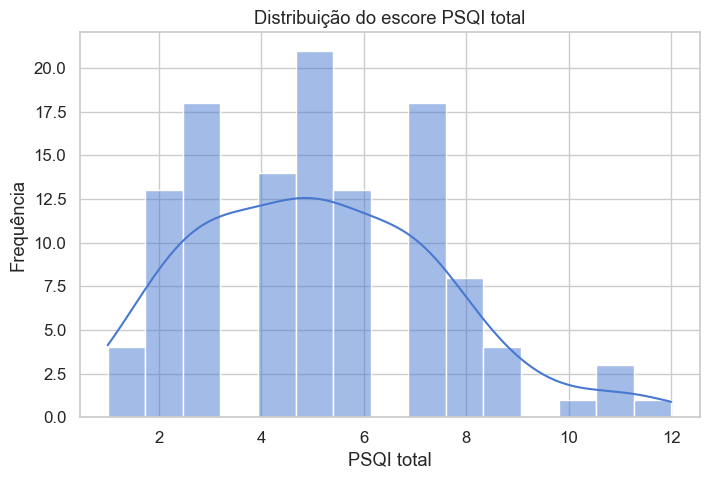

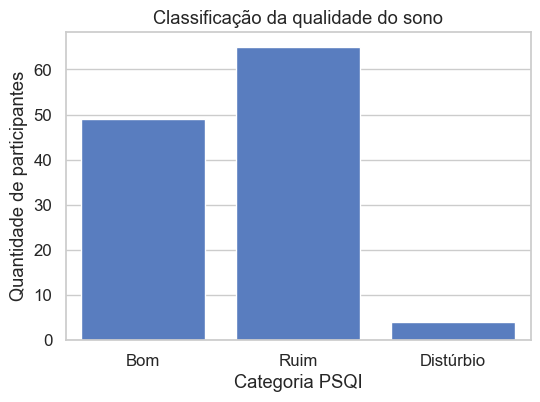

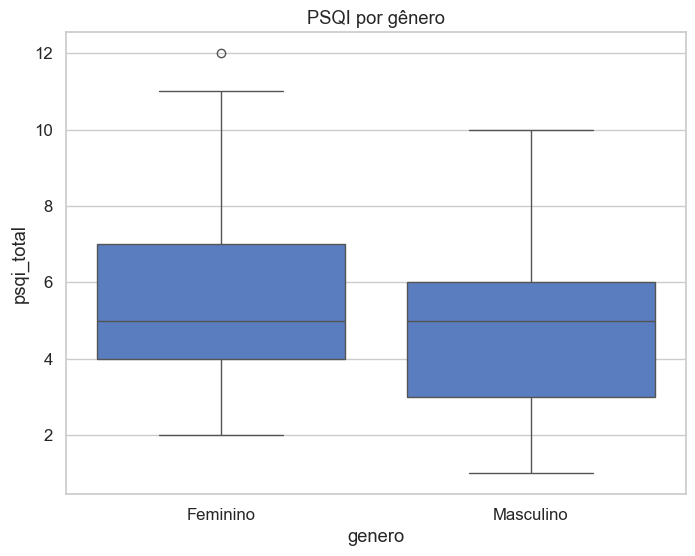

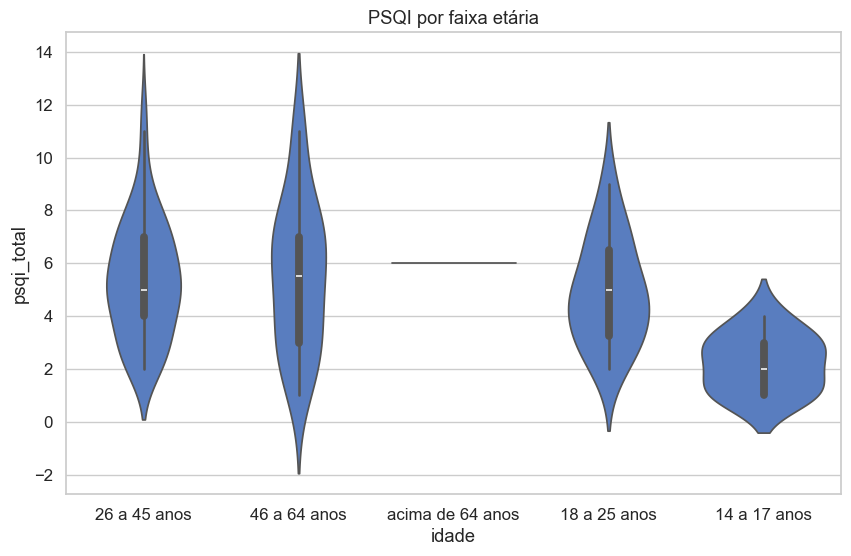

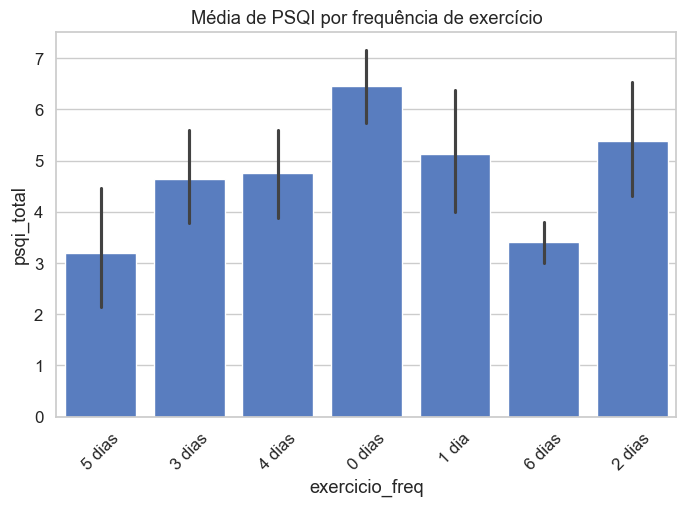

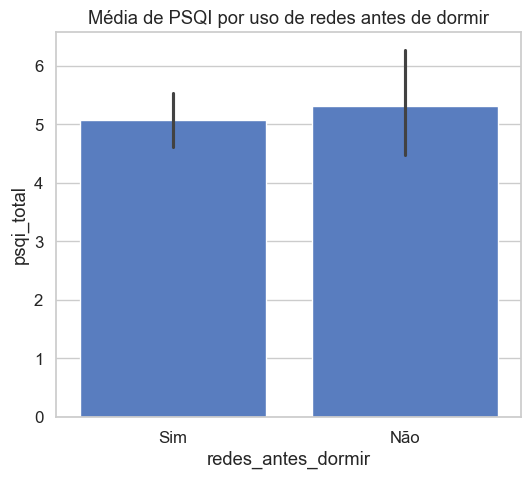

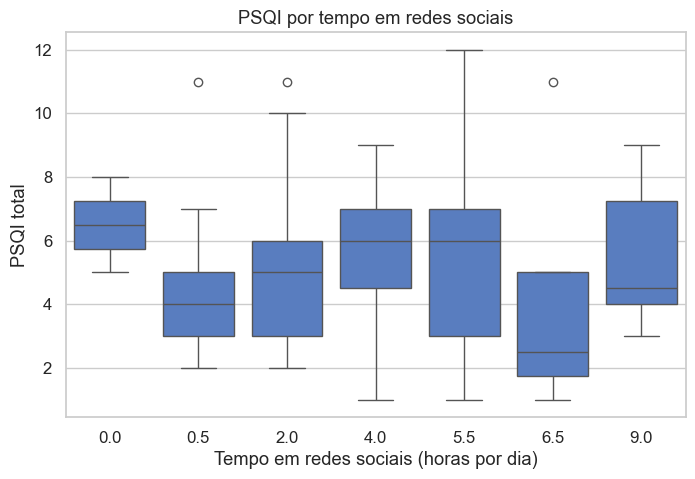

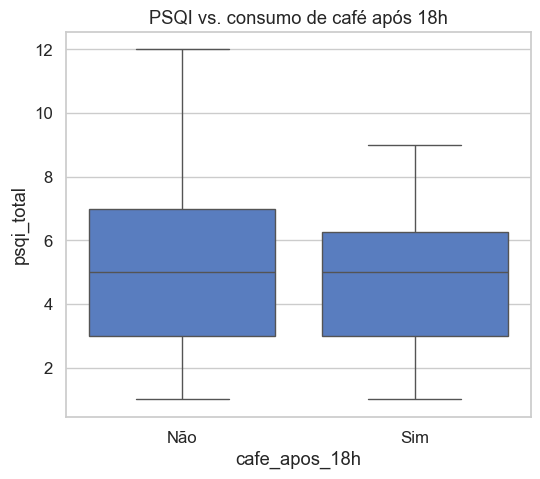

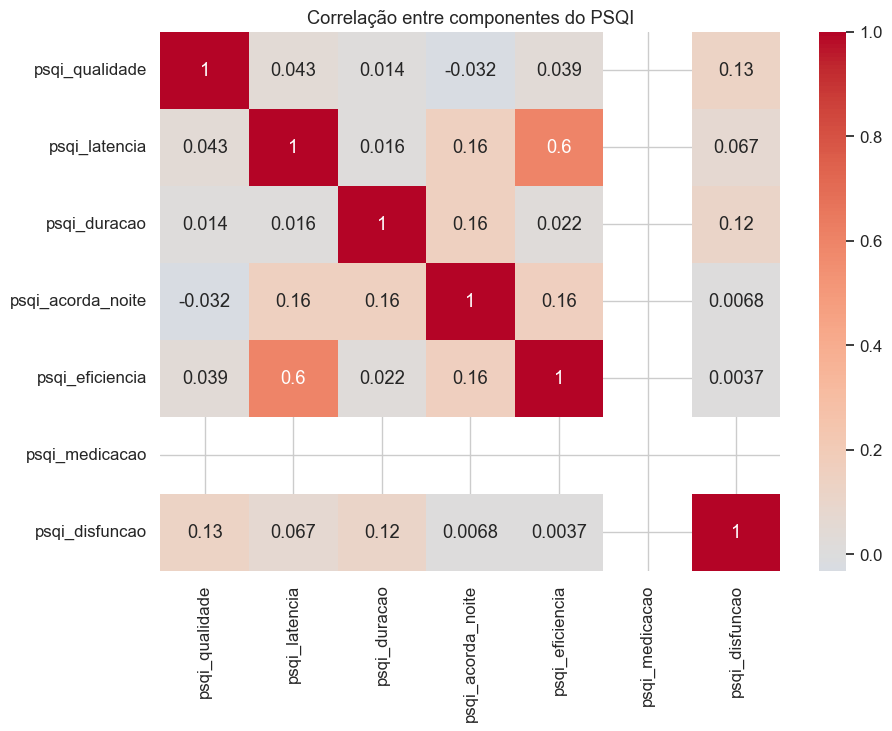

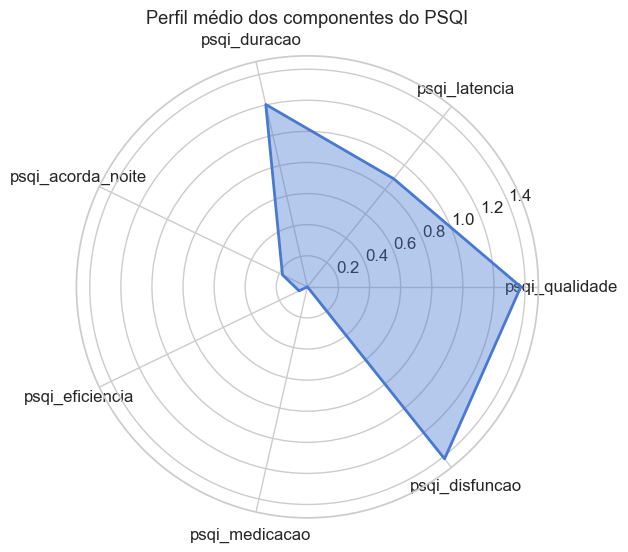

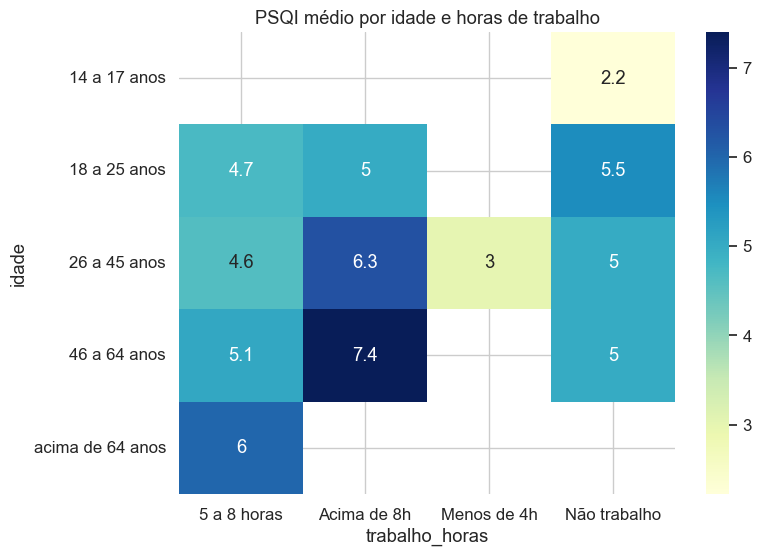

In [12]:
# Para melhorar visualizaçaoes
dados['exercicio_freq'].replace({"Não pratico atividades físicas": "0 dias"}, inplace=True)
dados['redes_horas'].replace({
    'Não utilizo redes sociais': 0.0,
    'Até 1 hora por dia': 0.5,
    'Até 3 horas por dia': 2.0,
    'Até 5 horas por dia': 4.0,
    'Até 6 horas por dia': 5.5,
    'Até 7 horas por dia': 6.5,
    'Mais de 8 horas por dia': 9.0
}, inplace=True)

gerar_graficos(dados)

## Testando Hipótestes

### H1: *Maior tempo de tela (`redes_horas`) está associado a pior sono (`psqi_total`).*

In [23]:
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# Correlação
pearson_corr, pearson_p = pearsonr(dados["redes_horas"], dados["psqi_total"])
spearman_corr, spearman_p = spearmanr(dados["redes_horas"], dados["psqi_total"])

print("Correlação Pearson:", pearson_corr, "p-valor:", pearson_p)
print("Correlação Spearman:", spearman_corr, "p-valor:", spearman_p)

# Regressão linear
X = dados[["redes_horas"]]
y = dados["psqi_total"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercepto:", lin_reg.intercept_)
print("Coeficiente redes_horas:", lin_reg.coef_[0])
print("R²:", lin_reg.score(X, y))

Correlação Pearson: 0.06718282848952993 p-valor: 0.4697777159948622
Correlação Spearman: 0.084108210337484 p-valor: 0.3651852524641599
Intercepto: 4.885751913737756
Coeficiente redes_horas: 0.07654951024775701
R²: 0.004513532443853552



### Interpretação

1. **Correlação fraca e não significativa**

   * Tanto Pearson quanto Spearman dão valores próximos de 0.
   * p-valor > 0.05 → não há evidência estatística de associação.

2. **Regressão linear confirma**

   * O coeficiente é **positivo** (cada hora a mais em redes está associada a aumento de 0.076 no PSQI total).
   * Mas o valor é **muito pequeno** e o R² = 0.0045 → o modelo explica menos de 1% da variabilidade no sono.

3. **Conclusão preliminar para H1**

   * Nos dados, **não há evidência de que mais horas em redes sociais estejam associadas a pior qualidade do sono (psqi\_total)**.
   * A relação é fraca e estatisticamente não significativa.

### H2: *Uso de redes sociais após as 22h (`redes_antes_dormir`) aumenta chance de sono ruim (`psqi_total >= 5`).*

In [26]:
import numpy as np

# Criar variável binária para 'uso de redes após dormir'
dados["redes_antes_dormir_bin"] = np.where(dados["redes_antes_dormir"] == "Sim", 1, 0)

# Já criamos a variável sono_ruim antes (psqi_total >= 5)
dados["sono_ruim"] = np.where(dados["psqi_total"] >= 5, 1, 0)

# Regressão logística
from sklearn.linear_model import LogisticRegression

X = dados[["redes_antes_dormir_bin"]]
y = dados["sono_ruim"]

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

print("Intercepto:", log_reg.intercept_)
print("Coef redes_antes_dormir:", log_reg.coef_[0][0])
print("Acurácia:", log_reg.score(X, y))

Intercepto: [0.67759176]
Coef redes_antes_dormir: -0.3967679365302077
Acurácia: 0.5847457627118644


### Interpretação

1. **Coeficiente negativo (-0.397)**

   * Indica que, nos nossos dados, **usar redes após 22h está associado a menor chance de sono ruim** (o oposto do que era esperado na hipótese).
   * Como é regressão logística, o coeficiente é em log-odds. Convertendo para **odds ratio**:

     $$
     OR = e^{-0.397} \approx 0.67
     $$

     Ou seja, quem usa redes após 22h tem **33% menos chance** de relatar sono ruim — mas cuidado, isso pode ser efeito de viés, amostra pequena ou variáveis de confusão.

2. **Acurácia baixa (\~0.58)**

   * O modelo quase não melhora em relação a um chute aleatório (50%).
   * Isso mostra que **só a variável `redes_antes_dormir` não é suficiente para prever qualidade do sono**.

3. **Conclusão preliminar para H2**

   * Não há evidência clara de que usar redes sociais após 22h piore o sono em nossos dados.
   * O resultado foi o contrário, mas com baixo poder preditivo.


### H3: *Controlar fatores de confusão (`idade`, `trabalho_horas`, `exercicio_freq`, `cafe_apos_18h`).*